In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/yeast-molecular-genetics/gene_data_GO.csv
/kaggle/input/yeast-molecular-genetics/gene_data_locus.csv
/kaggle/input/yeast-molecular-genetics/gene_seq.csv


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

In [4]:
df = pd.read_csv('/kaggle/input/yeast-molecular-genetics/gene_data_GO.csv')
df.head()

,description,go_BioProc,go_CellComp,go_MolFunc,proteinname
0,Mitochondrial protein of unknown function,mitophagy:mitochondrion organization:biologica...,mitochondrion:mitochondrial outer membrane:mem...,molecular_function unknown,Fun14p
1,"Protein of unknown function, required for norm...",biological_process unknown,cytoplasm:membrane:integral component of membrane,molecular_function unknown,Mtc4p
2,S-adenosylmethionine transporter of the mitoch...,transport:S-adenosyl-L-methionine transport:S-...,mitochondrion:mitochondrial inner membrane:mem...,S-adenosyl-L-methionine transmembrane transpor...,Pet8p
3,Cyclin-dependent protein kinase regulatory sub...,"chromatin remodeling:transcription, DNA-templa...",cyclin-dependent protein kinase holoenzyme com...,cyclin-dependent protein serine/threonine kina...,Cks1p
4,Protein of unknown function; induced by ketoco...,transport:protein transport:eisosome assembly:...,plasma membrane:membrane:integral component of...,molecular_function unknown,Fhn1p


In [5]:
df.columns

Index(['description', 'go_BioProc', 'go_CellComp', 'go_MolFunc',
       'proteinname'],
      dtype='object')

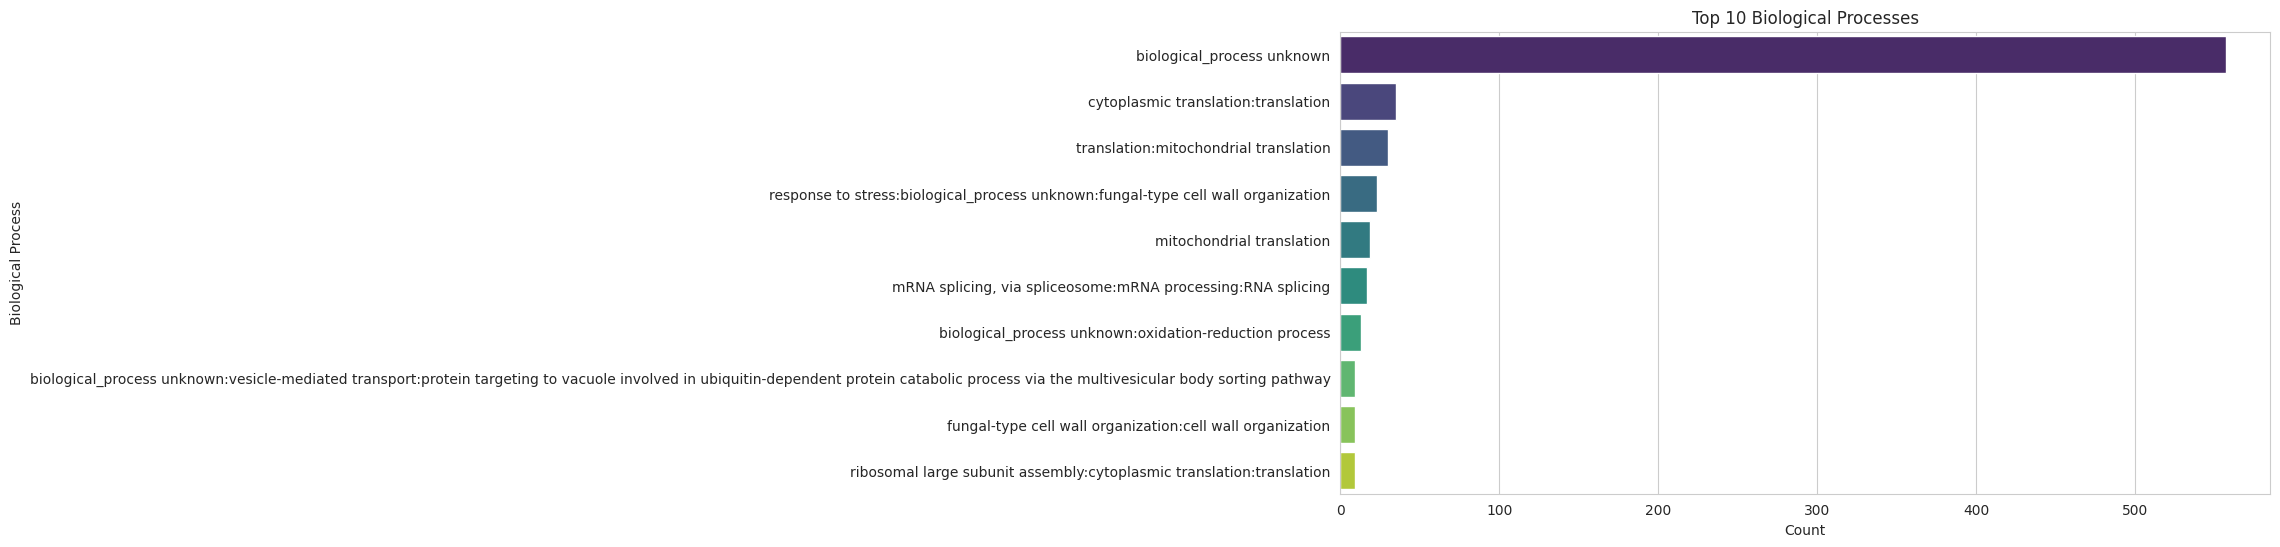

In [6]:
# Set style for plots
sns.set_style('whitegrid')

# Plot distribution of biological processes
plt.figure(figsize=(12, 6))
top_bio_proc = df['go_BioProc'].value_counts().nlargest(10)
sns.barplot(x=top_bio_proc.values, y=top_bio_proc.index, palette='viridis')
plt.title('Top 10 Biological Processes')
plt.xlabel('Count')
plt.ylabel('Biological Process')
plt.show()

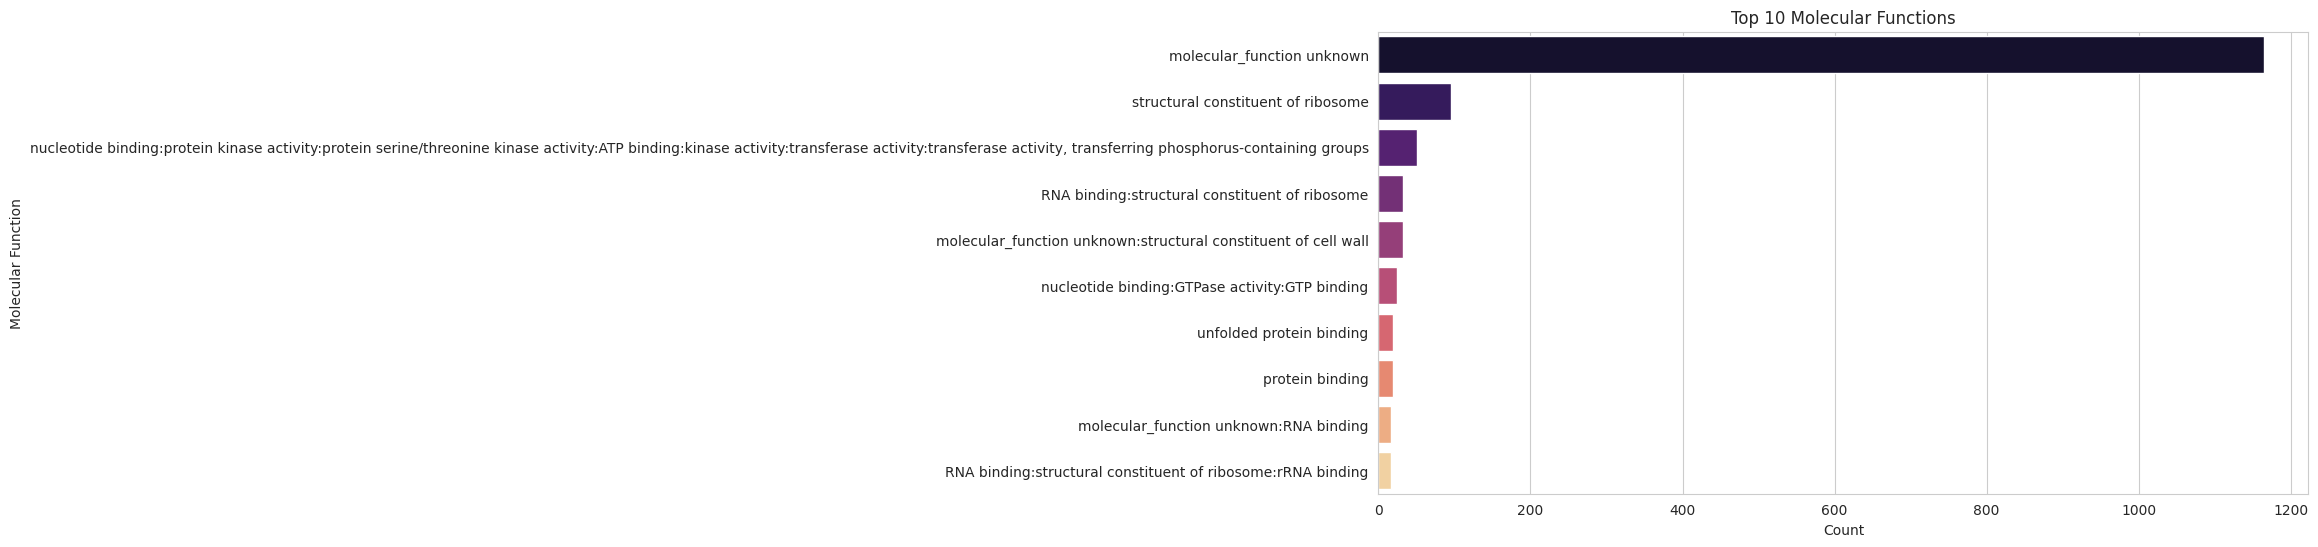

In [7]:
# Plot distribution of molecular functions
plt.figure(figsize=(12, 6))
top_mol_func = df['go_MolFunc'].value_counts().nlargest(10)
sns.barplot(x=top_mol_func.values, y=top_mol_func.index, palette='magma')
plt.title('Top 10 Molecular Functions')
plt.xlabel('Count')
plt.ylabel('Molecular Function')
plt.show()

In [8]:
# Encode categorical variables
le = LabelEncoder()
df['go_BioProc_encoded'] = le.fit_transform(df['go_BioProc'])
df['go_MolFunc_encoded'] = le.fit_transform(df['go_MolFunc'])
df['go_CellComp_encoded'] = le.fit_transform(df['go_CellComp'])

In [9]:
# Prepare features and target
X = df[['go_BioProc_encoded', 'go_MolFunc_encoded', 'go_CellComp_encoded']]
y = df['proteinname']

In [10]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [11]:
# Initialize and train Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [12]:
# Make predictions
y_pred = rf.predict(X_test)

# Evaluate model
print("\nModel Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Print best model
print("\nBest Model: Random Forest Classifier")


Model Evaluation:
Accuracy: 0.00

Classification Report:
              precision    recall  f1-score   support

       Aac1p       0.00      0.00      0.00       1.0
      Aad14p       0.00      0.00      0.00       1.0
      Aad15p       0.00      0.00      0.00       1.0
       Aat2p       0.00      0.00      0.00       0.0
       Abf2p       0.00      0.00      0.00       1.0
     Abp140p       0.00      0.00      0.00       0.0
       Abp1p       0.00      0.00      0.00       1.0
       Acb1p       0.00      0.00      0.00       1.0
       Acc1p       0.00      0.00      0.00       0.0
       Acf2p       0.00      0.00      0.00       1.0
       Acl4p       0.00      0.00      0.00       1.0
       Aco1p       0.00      0.00      0.00       0.0
       Acp1p       0.00      0.00      0.00       1.0
       Acs1p       0.00      0.00      0.00       1.0
       Acs2p       0.00      0.00      0.00       1.0
       Ada2p       0.00      0.00      0.00       1.0
      Add37p       0.00

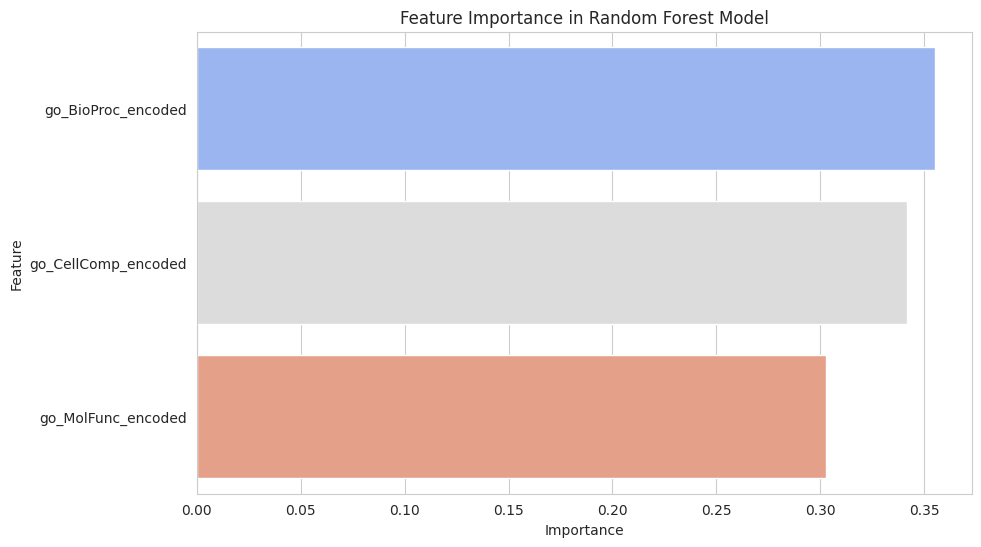

In [13]:
# Get feature importances
importances = rf.feature_importances_
features = X.columns

# Create DataFrame for visualization
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values('Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='coolwarm')
plt.title('Feature Importance in Random Forest Model')
plt.show()

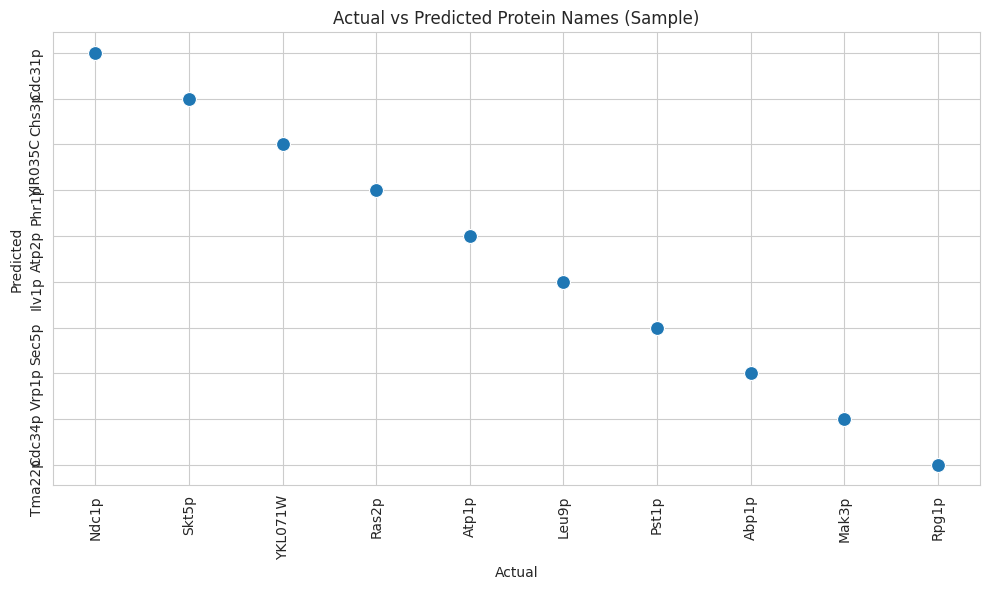

In [14]:
# Get a sample of predictions
sample_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}).sample(10)

# Plot actual vs predicted
plt.figure(figsize=(10, 6))
sns.scatterplot(data=sample_df, x='Actual', y='Predicted', s=100)
plt.title('Actual vs Predicted Protein Names (Sample)')
plt.xticks(rotation=90)
plt.yticks(rotation=90)
plt.tight_layout()
plt.show()